# ---------------------------- OVERVIEW & DATA PREPARATION ---------------------------------------

## OBJECTIVES OF THIS FIRST NOTEBOOK:
* **Overview of data** (getting familiar with data table definition/description of field name and basic star scheme model to visualize data)
* **Checking for data quality** before cleaning data: data shape, type, null value,unique value
* **Basic data cleaning**: null value (table of null count,%), records duplications (duplication count,%), data inconsistency in data type, realistic range of data field, realistic distribution of data (abnormal trend)
* **Save prepared data** for next notebook (Adhoc Analysis, Feature/Metrics generating and Dashboard)

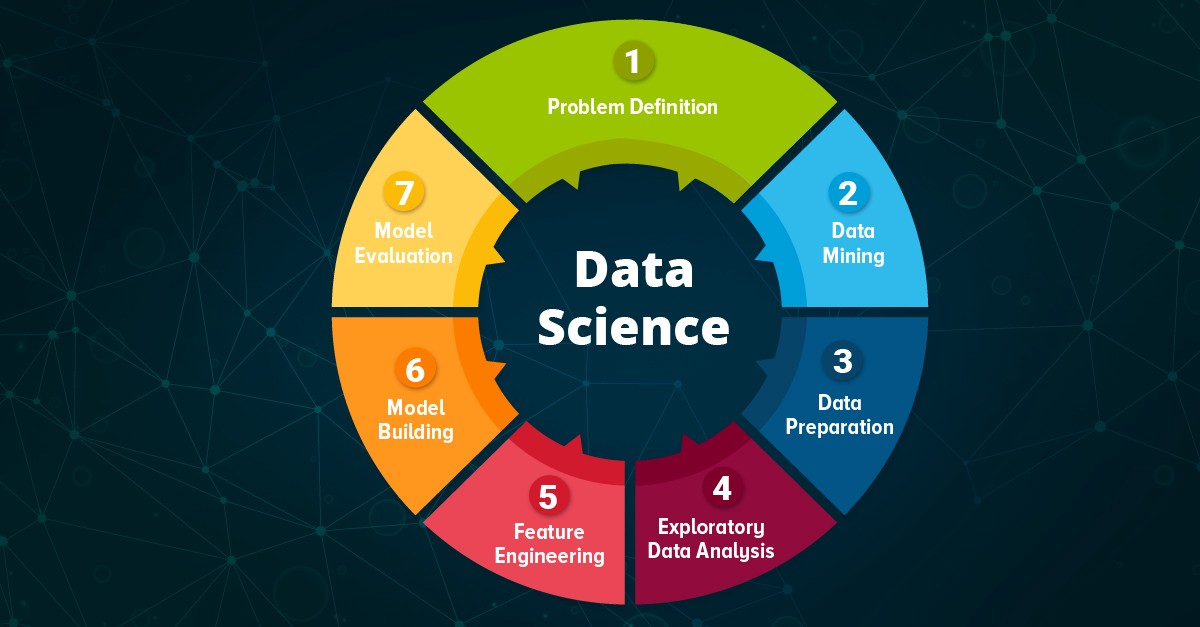

In [1]:
from IPython.display import Image
Image(filename='D:\ProgramsX\Project\ds1st\OneMount\images\Data-Exploration.jpg')

# Some example guide on data quality checks

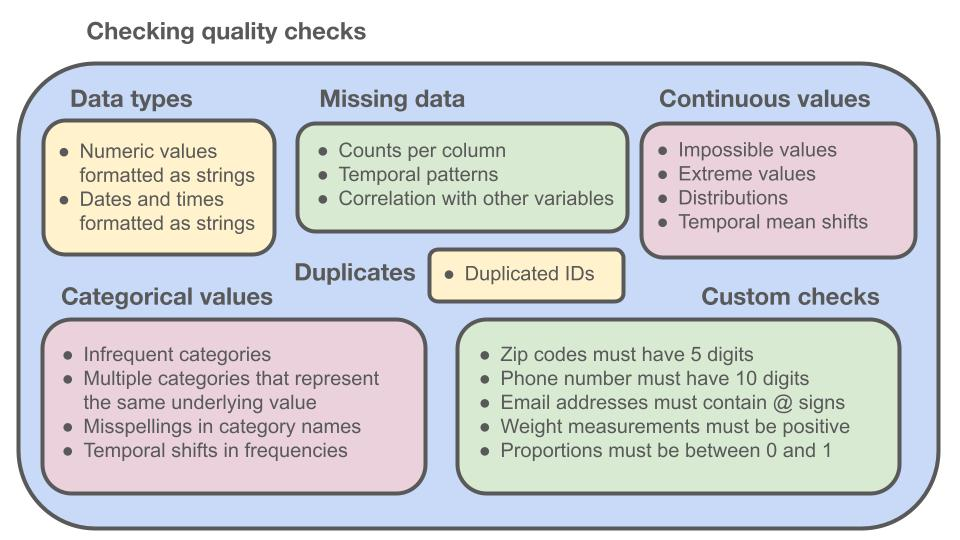

In [2]:
Image(filename='D:\ProgramsX\Project\ds1st\OneMount\images\dataqualitychecking.jpg')

## Importing Lirary

In [3]:
# OS 
import os
import pathlib
import warnings

# Excel manipulator (Install openpyxl first)
import openpyxl

# Data Manipulation
import pandas as pd
import numpy as np
import scipy.stats
import datetime 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import dash 

In [4]:
# System setting
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 100

# Overview

### Load datasets into notebooks

In [5]:
# Chang dir to folder that hold data
os.getcwd()
os.chdir(r'D:\\ProgramsX\\Project\\ds1st\\OneMount\\data')

In [6]:
# Get possible sheet name before loading into python
excel_file = pd.ExcelFile([x for x in os.listdir() if 'xlsx' in x][0])
excel_file.sheet_names

['fact', 'd_scheme', 'd_voucher', 'd_merchant', 'd_user']

In [7]:
# Loading multiple table into list
df_list = [pd.read_excel([x for x in os.listdir() if 'xlsx' in x][0], sheet_name= sheet_names) for sheet_names in excel_file.sheet_names]

In [8]:
# Divided by name for later detail EDA and data manipulation
df_fct,df_sc,df_vc,df_mer,df_user = df_list

In [9]:
list(zip([df_fct,df_sc,df_vc,df_mer,df_user],df_list,excel_file.sheet_names))

[(        TRANSACTION_ID    SERIAL_NUMBER                  VOUCHER_CODE                           VOUCHER_NAME    AVAILABLE_FROM      AVAILABLE_TO         MERCHANT_CODE    ACTION   CALENDAR_DIM_ID USER_ID
  0                    1       2303368734  MA_HIGHLANDS_02012024_SF4410   Giảm 39,000đ cho hóa đơn từ 139,000đ  2024-01-02T10:00  2024-01-31T23:59             HIGHLANDS   Claimed  2024-01-02T00:00  12fcb2
  1                    2  916736899628631                       xXC3707                Thẻ nạp Viettel 50,000đ  2020-09-14T14:35  2024-12-31T23:59                   xXC  Redeemed  2024-02-02T00:00  c9877a
  2                    3       2283370694  MA_HIGHLANDS_02012024_SF4410   Giảm 39,000đ cho hóa đơn từ 139,000đ  2024-01-02T10:00  2024-01-31T23:59             HIGHLANDS  Redeemed  2024-01-05T00:00  b1ebc3
  3                    5       2194823027  MA_HIGHLANDS_01022024_SF4602   Giảm 39,000đ cho hóa đơn từ 149,000đ  2024-02-01T10:00  2024-02-29T23:59             HIGHLANDS   Claimed  

In [10]:
# Create dictionary of data for easy access to data
df_dict = {item[1]:item[0] for item in list(
    zip([df_fct,df_sc,df_vc,df_mer,df_user],
        excel_file.sheet_names)
)}

In [11]:
# Same location for easier manipulation and saving data 
id(df_fct),id(df_dict['fact']),id(df_list[0])

(2067377011600, 2067377011600, 2067377011600)

## Observing data

In [12]:
df_dict['fact'].head(50)

,TRANSACTION_ID,SERIAL_NUMBER,VOUCHER_CODE,VOUCHER_NAME,AVAILABLE_FROM,AVAILABLE_TO,MERCHANT_CODE,ACTION,CALENDAR_DIM_ID,USER_ID
0,1,2303368734,MA_HIGHLANDS_02012024_SF4410,"Giảm 39,000đ cho hóa đơn từ 139,000đ",2024-01-02T10:00,2024-01-31T23:59,HIGHLANDS,Claimed,2024-01-02T00:00,12fcb2
1,2,916736899628631,xXC3707,"Thẻ nạp Viettel 50,000đ",2020-09-14T14:35,2024-12-31T23:59,xXC,Redeemed,2024-02-02T00:00,c9877a
2,3,2283370694,MA_HIGHLANDS_02012024_SF4410,"Giảm 39,000đ cho hóa đơn từ 139,000đ",2024-01-02T10:00,2024-01-31T23:59,HIGHLANDS,Redeemed,2024-01-05T00:00,b1ebc3
3,5,2194823027,MA_HIGHLANDS_01022024_SF4602,"Giảm 39,000đ cho hóa đơn từ 149,000đ",2024-02-01T10:00,2024-02-29T23:59,HIGHLANDS,Claimed,2024-02-20T00:00,3e3bb8
4,6,VIN03IA6GQM,MA_BTASKEE_02062023_SF3423,Tặng 01 giờ Dịch vụ giúp việc tại nhà,2023-06-02T10:00,2024-02-29T23:59,DOSALESFORCE22049Rbo,Claimed,2024-02-10T00:00,a8ee0c
5,7,409863096882,xXC3724,"Thẻ nạp Mobifone 30,000đ",2021-11-23T15:00,2024-12-31T23:59,xXC,Redeemed,2024-02-25T00:00,2faf8eb3
6,8,87283116787410,xXC3715,"Thẻ nạp Vinaphone 30,000đ",2021-11-23T15:00,2024-12-31T23:59,xXC,Redeemed,2024-02-20T00:00,1654af
7,11,114049459444617,xXC3707,"Thẻ nạp Viettel 50,000đ",2020-09-14T14:35,2024-12-31T23:59,xXC,Claimed,2024-01-01T00:00,a62637
8,15,2284094294,MA_HIGHLANDS_02012024_SF4406,"Giảm 29,000đ cho hóa đơn từ 119,000đ",2024-01-02T10:00,2024-01-31T23:59,HIGHLANDS,Redeemed,2024-01-29T00:00,82ba31
9,16,VI9Z99VM,MAA_GONGCHA_27122023_SF4345,Mua 02 tặng 01 Đồ uống mùa lễ hội,2023-12-26T10:00,2024-01-31T23:59,DOSALESFORCE23356V0w,Claimed,2024-01-21T00:00,7fc1cd


In [13]:
df_dict['d_scheme'].head(50)

,discount_type,discount_amount,discount_percent,description,VOUCHER_CODE
0,Cash Voucher,0,0,">đổi điểm vinid nhận ngay mã thẻ nạp tiền điện thoại >mobifone> mệnh giá 20,000đ.",xXC3723
1,Buy 2 get 1,0,0,">voucher ưu đãi >khi mua 02 ly trà cỡ lớn (áp dùng tất cả dòng trà), khách hàng được tặng thêm 0...",MA_HIGHLANDS_01022024_SF4601
2,Free SKU,0,0,">voucher miễn phí combo cắt + hấp tóc trị giá 300,000đ dành cho> khách hàng nữ lần đầu trải nghi...",MA_YTOHAIRSALON_02062023_SF4718
3,Discount Fixed Amount (For Total Bill),300000,0,">voucher giảm 300,000đ cho hóa đơn 1,500,000đ áp dụng với hàng nguyên giá tại thời trang torano....",MAA_TORANO_24102023_SF4114
4,Discount Percentage (For SKU),0,5,">voucher ưu đãi giảm 5% cho đơn hàng bất kỳ khi mua sắm tại vua nệm.>giá sản phẩm khoảng từ 65,0...",MAA_VUANEM_01022024_SF4596
5,Discount Percentage (For SKU),0,40,">- thiết kế nhỏ gọn, trọng lượng nhẹ, dễ dàng cầm nắm và thao tác>- dung lượng pin lớn, cho thời...",MA_MISHIO_05012024_SF4432
6,Discount Percentage (For SKU),0,35,>giảm 35% không giới hạn đối với sản phẩm bảo hiểm tnds ô tô của bất kì đơn vị bảo hiểm nào khi ...,MA_SALADIN_14032024_SF4665
7,Discount Fixed Amount (For SKU),101000,0,">- b3: tiến hành peel da>- b4: xịt dung dịch cấp ẩm dịu da, tránh để da sốc nhiệt khi tiếp xúc v...",MAA_DLYNKCLINIC_24012024_SF4565
8,Discount Fixed Amount (For SKU),222000,0,">voucher giảm 222,000đ khi đăng ký khóa học >elsa> pro premium> 1 tháng chỉ còn 569,000đ (nguyên...",MAA_ELSASPEAK_24102023_SF4122
9,Cash Voucher,10000,0,"vào miền nam, đâu đâu cũng là những không khí ấm áp và hiện đại của nhà. tại hà nội, tp.hồ chí m...",xXC5181


In [14]:
df_dict['d_voucher'].head(50)

,voucher_code,total_stock,display_date_from,display_date_to
0,MA_Hoayeuthuong_01032024_SF4672,400,2024-03-19 10:00:00,2024-04-30 23:59:00
1,MA_ROBINSTORE_19032024_SF4775,200,2024-03-29 10:00:00,2024-04-30 23:59:00
2,MAA_TUELAMBEAUTY_24012024_SF4562,500,2024-01-30 10:00:00,2024-03-31 23:59:00
3,MA_HIGHLANDS_01022024_SF4599,20000,2024-02-01 10:00:00,2024-02-29 23:59:00
4,MAP_CITiGYM_27062023_SF3464,9699,2023-06-27 10:00:00,2024-06-30 23:59:00
5,MA_CANIFA_17012024_SF4518,1200,2024-01-17 10:00:00,2024-02-29 23:59:00
6,MA_MYKINGDOM_05022024_SF4614,3000,2024-02-05 00:00:00,2024-02-29 21:00:00
7,xXC5103,140,2022-03-07 10:00:00,2024-09-20 23:59:00
8,MAA_SCOTSENGLISH_25102023_SF4391,100,2023-12-29 10:00:00,2024-03-31 23:59:00
9,FLASHSALE12_BILLPAY30K,180,2023-12-12 16:00:00,2024-01-05 23:59:00


In [15]:
df_dict['d_merchant'].head(50)

,MERCHANT_CODE,category,sub_category
0,DOSALESFORCE22049Rbo,Nhà cửa - Đời sống,Dịch vụ hỗ trợ gia đình
1,bt9,Nhà cửa - Đời sống,Hoa & Quà lưu niệm
2,DOSALESFORCE23199Um5,Ẩm thực,Đồ uống
3,GOLDENGATE,Ẩm thực,Nhà hàng - Quán ăn
4,HIGHLANDS,Ẩm thực,Đồ uống
5,0300521758PNJ,Thời trang và Phong cách sống,Trang sức - Phụ kiện
6,0313506115AHAMOVE,Vận tải - Giao vận,Dịch vụ giao hàng
7,DOSALESFORCE23272J0e,Sức khỏe - Làm đẹp,Spa - Thẩm mỹ
8,DOSALESFORCE23334ssx,Ẩm thực,Nhà hàng - Quán ăn
9,xXC,Bán lẻ FMCG,Cửa hàng tiện lợi


In [16]:
df_dict['d_user'].head(50)

,gender,user_id,province_name,age
0,F,76843,Hà Nội,O55
1,NaN,13346d5,Miền Trung,25_34
2,NaN,132ed57,Hồ Chí Minh,UNIDENTIFIED
3,F,ac6216,Miền Bắc,U18
4,M,cb2f6f,HÀ NỘI,O55
5,F,bf0a44,UNIDENTIFIED,25_34
6,M,7ad3ce,Miền Trung,18_24
7,F,2fb03506,Miền Bắc,35_44
8,NaN,133604c,Miền Trung,UNIDENTIFIED
9,M,91bc67,Miền Bắc,45_54


## Quick Logic checking for meaningful feature
### Meaningful table mean table with features that are easy or have indicator for logic checking (user demographic, scheme type)

In [17]:
# date checking
df_dict['d_user'].age.value_counts()

age
45_54           7502
28              7497
25_34           7473
O55             7385
UNIDENTIFIED    7384
18_24           7380
U18             7330
35_44           7278
39               610
35               609
36               598
44               590
47               585
46               574
42               574
41               571
43               566
37               558
40               557
45               546
38               524
Hai Tư            26
Name: count, dtype: int64

- age including both range, single number and string , UNIDENTIFIED is also too long of a name to display on graph

In [18]:
# Replace value 
df_dict['d_user']['age'] = df_dict['d_user']['age'].astype(str).replace({
    '28':'25_34',
    'UNIDENTIFIED':'NaN',
    '39':'35_44',
    '35':'35_44',
    '36':'35_44',
    '44':'35_44',
    '47':'45_54',
    '46':'45_54',
    '42':'35_44',
    '41':'35_44',
    '43':'35_44',
    '37':'35_44',
    '40':'35_44',
    '45':'45_54',
    '38':'35_44',
    'Hai Tư':'18_24'
}) 
df_dict['d_user']['age'] = df_dict['d_user']['age'].astype(str).replace({
    'U18':'01.U18','18_24':'02.18_24','25_34':'03.25_34','35_44':'04.35_44','45_54':'05.45_54','O55':'06.O55','NaN':'07.NaN'
    })

In [19]:
df_dict['d_user'].age.value_counts().sort_index()

age
01.U18       7330
02.18_24     7406
03.25_34    14970
04.35_44    13035
05.45_54     9207
06.O55       7385
07.NaN       7384
Name: count, dtype: int64

In [20]:
df_dict['d_user'].province_name.value_counts()

province_name
HCM             6216
ĐN              6176
Hànoi           6166
HÀ NỘI          6085
Miền Trung      6044
UNIDENTIFIED    6041
Hồ Chí Minh     6033
Miền Bắc        6032
Hà Nội          6017
Đà Nẵng         5959
Miền Nam        5948
Name: count, dtype: int64

- province_name mixed up between city/province and region. Also different name pointing as the same group. Also, only the biggest city of each region is mentioned so city = region.
- name of column, province is also wrong, should be region.

In [21]:
df_dict['d_user']['province_name'] = df_dict['d_user']['province_name'].replace({
    'Hồ Chí Minh': 'MN',
    'HCM':'MN',
    'ĐN':'MT',
    'Hànoi':'MB',
    'HÀ NỘI':'MB',
    'Miền Trung':'MT',
    'UNIDENTIFIED':'NaN',
    'Miền Bắc':'MB',
    'Hà Nội':'MB',
    'Đà Nẵng':'MT',
    'Miền Nam':'MN'
})

df_dict['d_user'] = df_dict['d_user'].rename(columns = {'province_name':'region_name'})

In [22]:
df_dict['d_user'].region_name.value_counts()

region_name
MB     24300
MN     18197
MT     18179
NaN     6041
Name: count, dtype: int64

In [23]:
df_dict['d_user'].gender.value_counts()

gender
F              38740
M              21706
unavailable       23
Name: count, dtype: int64

- for gender, NaN and unavailable are basically the same in most scenario, especially in dashboard with unavailable in such small count

In [24]:
df_dict['d_user']['gender'] = df_dict['d_user']['gender'].replace({
    'unavailable':'NaN',
})

In [25]:
df_dict['d_user'].gender.value_counts()

gender
F      38740
M      21706
NaN       23
Name: count, dtype: int64

In [26]:
df_dict['d_scheme']['discount_type'].value_counts()

discount_type
Discount Percentage (For SKU)             71
Cash Voucher                              67
Discount Fixed Amount (For SKU)           57
Discount Fixed Amount (For Total Bill)    52
Free SKU                                  37
Discount Percentage (For Total Bill)      13
Combo Bundle                               7
Buy 2 get 1                                6
Buy 1 get 1                                3
Others                                     2
Name: count, dtype: int64

- Here discount type indicates clear which type of discount (amount/cash,percent,2/1 get 1,free SKU or others) it is. So based on column amount and percent discount it should be easy to check logic of these 3 columns together

In [27]:
# First type that contain amount or cash should always provide amount and not percent
df_dict['d_scheme'][df_dict['d_scheme'].discount_type.str.contains('|'.join(['Cash','Amount']))]

,discount_type,discount_amount,discount_percent,description,VOUCHER_CODE
0,Cash Voucher,0,0,">đổi điểm vinid nhận ngay mã thẻ nạp tiền điện thoại >mobifone> mệnh giá 20,000đ.",xXC3723
3,Discount Fixed Amount (For Total Bill),300000,0,">voucher giảm 300,000đ cho hóa đơn 1,500,000đ áp dụng với hàng nguyên giá tại thời trang torano....",MAA_TORANO_24102023_SF4114
7,Discount Fixed Amount (For SKU),101000,0,">- b3: tiến hành peel da>- b4: xịt dung dịch cấp ẩm dịu da, tránh để da sốc nhiệt khi tiếp xúc v...",MAA_DLYNKCLINIC_24012024_SF4565
8,Discount Fixed Amount (For SKU),222000,0,">voucher giảm 222,000đ khi đăng ký khóa học >elsa> pro premium> 1 tháng chỉ còn 569,000đ (nguyên...",MAA_ELSASPEAK_24102023_SF4122
9,Cash Voucher,10000,0,"vào miền nam, đâu đâu cũng là những không khí ấm áp và hiện đại của nhà. tại hà nội, tp.hồ chí m...",xXC5181
...,...,...,...,...,...
304,Discount Fixed Amount (For SKU),570000,0,"nhưng phải đảm bảo tính hiệu quả cao.>- bước >5: sau khi triệt lông, kỹ thuật viên dùng khăn ẩm ...",MAA_WONHEEKOREA_01112023_SF4130
306,Discount Fixed Amount (For Total Bill),50000,0,">voucher ưu đãi giảm 50,000đ cho hóa đơn mua sắm từ 500,000đ tại >decathlon.>giá sản phẩm từ 79,...",MAA_DECATHLON_10112023_SF4195
307,Discount Fixed Amount (For SKU),2301000,0,">*>lưu ý>: sau 15 phút thực hiện, hiệu quả sẽ dần xuất hiện và qua 24 tiếng, bạn sẽ thấy da sáng...",MAA_PMTAESTHETICCLINIC_01112023_SF4126
308,Discount Fixed Amount (For SKU),25000,0,">giảm 25,000đ đối với sản phẩm bảo hiểm tnds xe máy của bất kì đơn vị bảo hiểm nào khi mua trên ...",MA_SALADIN_14032024_SF4666


In [28]:
# See that not all Cash Voucher contain Cash
# Check again without cash
_tab = df_dict['d_scheme'][df_dict['d_scheme'].discount_type.str.contains('|'.join(['Amount']))]
# Without Amount
print(_tab[_tab.discount_amount <= 0].discount_type.value_counts())
print('-'*50)
# With Amount
print(_tab[_tab.discount_amount > 0].discount_type.value_counts())

discount_type
Discount Fixed Amount (For SKU)    8
Name: count, dtype: int64
--------------------------------------------------
discount_type
Discount Fixed Amount (For Total Bill)    52
Discount Fixed Amount (For SKU)           49
Name: count, dtype: int64


- Seem like there is distinguished relationship between discount_type and 2 value columns: amount and percent
- We should be careful if use these value columns for analysis or dashboard

### DESIGN SUMMARY TABLE 
> *Each table in 5: basic Meta Data + Aggregation over total table + Data quality indicator before/after correction*

## column dimension: 
1) **General**: `table_name` , `table_total_col` , `table_total_row` , `table_record_duplication` , `table_id_duplication` (primary key only). `[XXX - DONE]`
   - *Group dtype:*: `STR` for name else `INT`

2) **Dtype**: `org_dtype` , `supposed_dtype` , `lst_dtype`.              `[XXX - DONE]`
   - *Group dtype:* `CATEGORY STR` in either [`category`,`continuous` or `datetime`]

3) **Null**: `org_null_cnt`, `org_null_%` , `lst_null_cnt` ,`lst_null_%`. 
   - *Group dtype:* `INT` and `FLOAT{.4f}` max 100%

4) **Unique_Value**: `org_unique_cnt`, `org_unique%` , `lst_unique_cnt`, `lst_unique_%`. 
   - *Group dtype:* `INT` and `FLOAT{.4f}` max 100%

5) **Continuous**: for features that are continuous `org_range_min` , `org_range_max` , `lst_range_min` , `lst_range_max` , `quantile_50` , `quantile_95`
   - *Group dtype:* `INT`, `FLOAT{.4f}` max 100% or `DATETIME`

6) **Category**: for categorical features `str_min_len` , `str_max_len` , `most_frequent` , `%frequent`, we dont have time and more detail of the business definition of each category to group similar meaning or correct mis-spelling.

## row dimension: 
- **Feature_name**

In [29]:
from numpy import dtype

# Print out the original dtype
# true_dtype = {}
# for table_name in df_dict.keys():
#     true_dtype[table_name] = {obj[0]:obj[1] for obj in list(zip(df_dict[table_name].dtypes.index.tolist(),df_dict[table_name].dtypes.values.tolist()))}
# print(true_dtype)



# Dtype that want to configurate column to
true_dtype = {
    'fact': {'TRANSACTION_ID': dtype('int64'), 'SERIAL_NUMBER': dtype('O'), 'VOUCHER_CODE': dtype('O'), 'VOUCHER_NAME': dtype('O'), 'AVAILABLE_FROM': dtype('datetime64[ns]'), 'AVAILABLE_TO': dtype('datetime64[ns]'), 'MERCHANT_CODE': dtype('O'), 'ACTION': dtype('O'), 'CALENDAR_DIM_ID': dtype('datetime64[ns]'), 'USER_ID': dtype('O')}, 
    
    'd_scheme': {'discount_type': dtype('O'), 'discount_amount': dtype('int64'), 'discount_percent': dtype('int64'), 'description': dtype('O'), 'VOUCHER_CODE': dtype('O')}, 
    
    'd_voucher': {'voucher_code': dtype('O'), 'total_stock': dtype('int64'), 'display_date_from': dtype('datetime64[ns]'), 'display_date_to': dtype('datetime64[ns]')}, 
    
    'd_merchant': {'MERCHANT_CODE': dtype('O'), 'category': dtype('O'), 'sub_category': dtype('O')}, 
    
    'd_user': {'gender': dtype('O'), 'user_id': dtype('O'), 'region_name': dtype('O'), 'age': dtype('O')}
}

# Primary ID columns name for each table 
primary_index = {
    'fact': 'TRANSACTION_ID', 'd_scheme':'VOUCHER_CODE','d_voucher':'voucher_code','d_merchant':'MERCHANT_CODE' ,'d_user':'user_id'
}


In [30]:
df_dict['fact']['SERIAL_NUMBER'].astype('string').dtype

string[python]

In [31]:
summary_table = pd.DataFrame(columns = ['tab_col_name', 'tab_name', 'tab_no_col', 'tab_no_row', 'tab_rc_dup', 'tab_pid_dup', 'dtype', 'true_dtype', 'lst_dtype', 'org_null_cnt', 'org_null%', 'lst_null_cnt', 'lst_null%', 'org_uniq_cnt', 'org_uniq%', 'lst_uniq_cnt', 'lst_uniq%'])

for table_name in df_dict.keys():
    summary_table = pd.concat([summary_table,
        pd.DataFrame({
    # Index
    'tab_col_name':df_dict[table_name].columns.to_list(),
    # Table properties
    'tab_name':[table_name] * df_dict[table_name].shape[1],
    'tab_no_col':[df_dict[table_name].shape[1] for x in range(df_dict[table_name].shape[1])],
    'tab_no_row':[df_dict[table_name].shape[0] for x in range(len(df_dict[table_name].columns))],
    'tab_rc_dup':[df_dict[table_name].duplicated().sum()] * df_dict[table_name].shape[1],
    'tab_pid_dup':[df_dict[table_name][primary_index[table_name]].duplicated().sum()] * df_dict[table_name].shape[1],
    # Columns properties
    #- Dtype
    'dtype':df_dict[table_name].dtypes.values.tolist(),
    'true_dtype':list(true_dtype[table_name].values()),
    'lst_dtype':[np.NaN for x in range(df_dict[table_name].shape[1])],
    #- Null
    'org_null_cnt': df_dict[table_name].isnull().sum().values.tolist(),
    'org_null%': (df_dict[table_name].isnull().sum()*100/len(df_dict[table_name])).values.tolist(),
    'lst_null_cnt':[np.NaN for x in range(df_dict[table_name].shape[1])],
    'lst_null%':[np.NaN for x in range(df_dict[table_name].shape[1])],
    #- Unique Value 
    'org_uniq_cnt': df_dict[table_name].nunique().values.tolist(),
    'org_uniq%': (df_dict[table_name].nunique()*100/len(df_dict[table_name])).values.tolist(),
    'lst_uniq_cnt':[np.NaN for x in range(df_dict[table_name].shape[1])],
    'lst_uniq%':[np.NaN for x in range(df_dict[table_name].shape[1])],
})
                       ])

summary_table.reset_index(drop = True,inplace = True)

In [32]:
summary_table.head(50)

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%
0,TRANSACTION_ID,fact,10,303943,0,0,int64,int64,NaN,0,0.0000,NaN,NaN,303943,100.0000,NaN,NaN
1,SERIAL_NUMBER,fact,10,303943,0,0,object,object,NaN,0,0.0000,NaN,NaN,210814,69.3597,NaN,NaN
2,VOUCHER_CODE,fact,10,303943,0,0,object,object,NaN,0,0.0000,NaN,NaN,266,0.0875,NaN,NaN
3,VOUCHER_NAME,fact,10,303943,0,0,object,object,NaN,0,0.0000,NaN,NaN,254,0.0836,NaN,NaN
4,AVAILABLE_FROM,fact,10,303943,0,0,object,datetime64[ns],NaN,0,0.0000,NaN,NaN,93,0.0306,NaN,NaN
5,AVAILABLE_TO,fact,10,303943,0,0,object,datetime64[ns],NaN,0,0.0000,NaN,NaN,62,0.0204,NaN,NaN
6,MERCHANT_CODE,fact,10,303943,0,0,object,object,NaN,0,0.0000,NaN,NaN,84,0.0276,NaN,NaN
7,ACTION,fact,10,303943,0,0,object,object,NaN,0,0.0000,NaN,NaN,2,0.0007,NaN,NaN
8,CALENDAR_DIM_ID,fact,10,303943,0,0,object,datetime64[ns],NaN,0,0.0000,NaN,NaN,60,0.0197,NaN,NaN
9,USER_ID,fact,10,303943,0,0,object,object,NaN,0,0.0000,NaN,NaN,50861,16.7337,NaN,NaN


### Next step in order before: categorical string min max and freq, continuous range min max and quantile -> first need to determine datatype
- 1) **correct dtype** to fit -> write function to change dtype: try + except (if cannot convert then fix error before continue)
- 2) **check duplicates** records and primary id
- 3) **check lst null**: null meaning (data import error while moving data or crm null, if crm null and not find on here meaning already impute with another value meaning null and if the column is not a continuous column -> category columns while do most analysis can show null as separate piece, continuous value just ignore it and we shouldnt do that, at least have some form of visualizing the number of null value). 
> Also, after change dtype of some integer or float -> check null again since **sometimes null in numerical columns is regard as string** (in this case that column cannot be transform directly to numeric and have to replace for example: string 'NULL' with np.NaN. 
> From this get lst_null_cnt and lst_null%
- 4) **Check unique value** again -> get last unique value,...
- 5) After that **add summary columns** for further categorical, continuous column data quality checking listed above:


### Check mis-datatype


In [33]:
summary_table[summary_table.dtype != summary_table.true_dtype]

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%
4,AVAILABLE_FROM,fact,10,303943,0,0,object,datetime64[ns],NaN,0,0.0000,NaN,NaN,93,0.0306,NaN,NaN
5,AVAILABLE_TO,fact,10,303943,0,0,object,datetime64[ns],NaN,0,0.0000,NaN,NaN,62,0.0204,NaN,NaN
8,CALENDAR_DIM_ID,fact,10,303943,0,0,object,datetime64[ns],NaN,0,0.0000,NaN,NaN,60,0.0197,NaN,NaN


In [34]:
summary_table[summary_table.dtype != summary_table.true_dtype]

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%
4,AVAILABLE_FROM,fact,10,303943,0,0,object,datetime64[ns],NaN,0,0.0000,NaN,NaN,93,0.0306,NaN,NaN
5,AVAILABLE_TO,fact,10,303943,0,0,object,datetime64[ns],NaN,0,0.0000,NaN,NaN,62,0.0204,NaN,NaN
8,CALENDAR_DIM_ID,fact,10,303943,0,0,object,datetime64[ns],NaN,0,0.0000,NaN,NaN,60,0.0197,NaN,NaN


In [35]:
#df_dict['d_merchant'].drop(inplace = True,columns = ['multi_cate','multi_subcate'])

In [36]:
#id = __builtins__.id
#id(df_dict['fact']['AVAILABLE_FROM']),id(df_dict['fact'].loc[:,'AVAILABLE_FROM'])

# Change dtype
for id,row in summary_table[summary_table.dtype != summary_table.true_dtype].iterrows():
    if row['true_dtype'] in [np.dtype('datetime64'),np.dtype('datetime64[ns]')]:
        # Dont use loc[:,col_name], seem like if __attributes__ or __item__ can set the dtype of that series straight but loc only give view (or something else, in fact they both point at the same memory location but if use loc then cannot change value
        print('type1')
        df_dict[row['tab_name']][row['tab_col_name']] = pd.to_datetime(df_dict[row['tab_name']][row['tab_col_name']])
    else:
        print('type2')
        df_dict[row['tab_name']][row['tab_col_name']] = df_dict[row['tab_name']][row['tab_col_name']].astype('O')
    
import itertools


# Update table 
summary_table['lst_dtype'] = list(
    itertools.chain.from_iterable(
        [df_dict[table_name].dtypes.values.tolist() for table_name in df_dict.keys()]
    )
)

type1
type1
type1


In [37]:
summary_table

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%
0,TRANSACTION_ID,fact,10,303943,0,0,int64,int64,int64,0,0.0000,NaN,NaN,303943,100.0000,NaN,NaN
1,SERIAL_NUMBER,fact,10,303943,0,0,object,object,object,0,0.0000,NaN,NaN,210814,69.3597,NaN,NaN
2,VOUCHER_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,NaN,NaN,266,0.0875,NaN,NaN
3,VOUCHER_NAME,fact,10,303943,0,0,object,object,object,0,0.0000,NaN,NaN,254,0.0836,NaN,NaN
4,AVAILABLE_FROM,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,NaN,NaN,93,0.0306,NaN,NaN
5,AVAILABLE_TO,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,NaN,NaN,62,0.0204,NaN,NaN
6,MERCHANT_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,NaN,NaN,84,0.0276,NaN,NaN
7,ACTION,fact,10,303943,0,0,object,object,object,0,0.0000,NaN,NaN,2,0.0007,NaN,NaN
8,CALENDAR_DIM_ID,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,NaN,NaN,60,0.0197,NaN,NaN
9,USER_ID,fact,10,303943,0,0,object,object,object,0,0.0000,NaN,NaN,50861,16.7337,NaN,NaN


### Check duplicates: 
- `d_merchant is the only table that have duplicates in its ID`, or merchant code
- Seem like `xXc merchant_code either refers to a lot of other merchandises` like small name and just grouped under xXc or xXc refer to some big merchandise/ecommerce like shoppee, either way we have to consider this factor when mapping between d_merchant and other table.

In [38]:
df_dict['d_merchant'][df_dict['d_merchant'].MERCHANT_CODE.duplicated()]

,MERCHANT_CODE,category,sub_category
11,xXC,Vận tải - Giao vận,Dịch vụ giao hàng
13,xXC,Bán lẻ FMCG,Siêu thị
27,xXC,Sức khỏe - Làm đẹp,"Mỹ phẩm - Chăm sóc da, tóc"
57,xXC,Mẹ & bé,NaN
64,xXC,Ẩm thực,Nhà hàng - Quán ăn
66,xXC,Thương mại điện tử,NaN
68,xXC,Ẩm thực,Đồ uống
70,VUAHANGHIEU,Thời trang và Phong cách sống,Trang sức - Phụ kiện
76,xXC,Tiện ích - Nhà mạng,Viễn thông
80,VUAHANGHIEU,Thời trang và Phong cách sống,Thời trang


In [39]:
# Creating flag/indicator for later Mapping & EDA

# Flag for MERCHANT_CODE with different category
df_dict['d_merchant']['multi_cate'] = df_dict['d_merchant'].groupby(['MERCHANT_CODE']).transform('size').where(lambda x: x > 1, 0).apply(lambda x: 1 if x > 0 else 0)
# Flag for MERCHANT_CODE with same category, different sub_category
df_dict['d_merchant']['multi_subcate'] = df_dict['d_merchant'].groupby(['MERCHANT_CODE','category']).transform('size').where(lambda x: x > 1, 0).apply(lambda x: 1 if x > 0 else 0)

In [40]:
# Check 
df_dict['d_merchant'][(df_dict['d_merchant'].multi_cate > 0) | (df_dict['d_merchant'].multi_subcate > 0)].sort_values(['MERCHANT_CODE','category','sub_category'], ascending=False)

,MERCHANT_CODE,category,sub_category,multi_cate,multi_subcate
68,xXC,Ẩm thực,Đồ uống,1,1
64,xXC,Ẩm thực,Nhà hàng - Quán ăn,1,1
11,xXC,Vận tải - Giao vận,Dịch vụ giao hàng,1,0
76,xXC,Tiện ích - Nhà mạng,Viễn thông,1,0
86,xXC,Thời trang và Phong cách sống,Thời trang,1,0
109,xXC,Thương mại điện tử,Thương mại điện tử,1,1
66,xXC,Thương mại điện tử,NaN,1,1
27,xXC,Sức khỏe - Làm đẹp,"Mỹ phẩm - Chăm sóc da, tóc",1,0
57,xXC,Mẹ & bé,NaN,1,0
13,xXC,Bán lẻ FMCG,Siêu thị,1,1


# Issue to be careful about before EDA:
- `Duplicated mapping key` including (MERCHANT_ID, CATEGORY, SUBCATEORY)
- `Extreme value for continuous value`: extreme value will dilute metrics such as average or sum... or relevant metrics. It also in some case make it hard for comparison for time series data or between different group (histogram, bar...)
- `Most frequent, Number of unique value for categorical` data (pie, bar... chart) wont be able to unveiled this data if too many unique values are present or the visualization will not be meaningful if category is dominated (over 80%) by only 1 category or subcategory.

In [41]:
# Check Null
summary_table[summary_table['org_null_cnt'] > 0]

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%
20,category,d_merchant,3,110,0,16,object,object,object,2,1.8182,NaN,NaN,12,10.9091,NaN,NaN
21,sub_category,d_merchant,3,110,0,16,object,object,object,7,6.3636,NaN,NaN,26,23.6364,NaN,NaN
22,gender,d_user,4,66717,0,0,object,object,object,6248,9.3649,NaN,NaN,3,0.0045,NaN,NaN


In [42]:
# All of the null are categorical columns so we just simple fill them with 'NaN' or 'NULL' for later EDA
for id,row in summary_table[summary_table['org_null_cnt'] > 0].iterrows():
    df_dict[row.tab_name].loc[:,row.tab_col_name].fillna('NaN',inplace=True)

In [43]:
df_dict['d_merchant'].isna().sum()

MERCHANT_CODE    0
category         0
sub_category     0
multi_cate       0
multi_subcate    0
dtype: int64

In [44]:
summary_table.loc[:,['lst_null_cnt','lst_null%']] = 0

In [45]:
summary_table

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%
0,TRANSACTION_ID,fact,10,303943,0,0,int64,int64,int64,0,0.0000,0.0000,0.0000,303943,100.0000,NaN,NaN
1,SERIAL_NUMBER,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,210814,69.3597,NaN,NaN
2,VOUCHER_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,266,0.0875,NaN,NaN
3,VOUCHER_NAME,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,254,0.0836,NaN,NaN
4,AVAILABLE_FROM,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,93,0.0306,NaN,NaN
5,AVAILABLE_TO,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,62,0.0204,NaN,NaN
6,MERCHANT_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,84,0.0276,NaN,NaN
7,ACTION,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,2,0.0007,NaN,NaN
8,CALENDAR_DIM_ID,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,60,0.0197,NaN,NaN
9,USER_ID,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,50861,16.7337,NaN,NaN


## Comment on unique value
- **Unique value low (<~10%)** meaning that column can be used as a display dimension for other aggregation fucntion (sum, average, portion...) of ID or total number of records. For example: Gender used as pie chart portion of total user in the portfolio.
- **Unique value = 100%** used as primary ID for that table, in case of merchant_code exception can be made for xXc (maybe present group other than the main, this will be treated differently)
- **Other value** will be treated differently depend on the case
> **Serial Number** (ambiguous so not use), **description** (is not full so will not use here) 

> **Category, sub_category** (12, 26) still more group than what we initially plan for visualizing so might group or only show top 

> **Time from and time to**: will be group to display in histogram, barchart or time series

> **Action, discount_type, customer information**: segmentation

> **Total stock, discount amount, discount percent**: Grouping for analysis

In [46]:
# We will respect the unique value and not treated it for now
summary_table.loc[:,['lst_uniq_cnt','lst_uniq%']] = summary_table.loc[:,['org_uniq_cnt','org_uniq%']].values.tolist()

## Continue checking for continous and categorical value
5) **Continuous**: for features that are continuous `org_range_min` , `org_range_max` , `lst_range_min` , `lst_range_max` , `quantile_50` , `quantile_95`
   - *Group dtype:* `INT`, `FLOAT{.4f}` max 100% or `DATETIME`

6) **Category**: for categorical features `str_min_len` , `str_max_len` , `most_frequent` , `%frequent`, we dont have time and more detail of the business definition of each category to group similar meaning or correct mis-spelling.

In [47]:
summary_table.isna().sum()

tab_col_name    0
tab_name        0
tab_no_col      0
tab_no_row      0
tab_rc_dup      0
tab_pid_dup     0
dtype           0
true_dtype      0
lst_dtype       0
org_null_cnt    0
org_null%       0
lst_null_cnt    0
lst_null%       0
org_uniq_cnt    0
org_uniq%       0
lst_uniq_cnt    0
lst_uniq%       0
dtype: int64

In [48]:
summary_table.columns

Index(['tab_col_name', 'tab_name', 'tab_no_col', 'tab_no_row', 'tab_rc_dup', 'tab_pid_dup', 'dtype', 'true_dtype', 'lst_dtype', 'org_null_cnt', 'org_null%', 'lst_null_cnt', 'lst_null%', 'org_uniq_cnt', 'org_uniq%', 'lst_uniq_cnt', 'lst_uniq%'], dtype='object')

In [49]:
#summary_table.drop(columns = ['org_rng_min', 'org_rng_max', 'lst_rng_min', 'last_rng_max', 'quantile_50', 'quantile_70', 'quantile_90', 'str_min_len', 'str_max_len', 'most_freq', '%freq'], inplace = True)

In [50]:
summary_table

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%
0,TRANSACTION_ID,fact,10,303943,0,0,int64,int64,int64,0,0.0000,0.0000,0.0000,303943,100.0000,303943.0000,100.0000
1,SERIAL_NUMBER,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,210814,69.3597,210814.0000,69.3597
2,VOUCHER_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,266,0.0875,266.0000,0.0875
3,VOUCHER_NAME,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,254,0.0836,254.0000,0.0836
4,AVAILABLE_FROM,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,93,0.0306,93.0000,0.0306
5,AVAILABLE_TO,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,62,0.0204,62.0000,0.0204
6,MERCHANT_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,84,0.0276,84.0000,0.0276
7,ACTION,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,2,0.0007,2.0000,0.0007
8,CALENDAR_DIM_ID,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,60,0.0197,60.0000,0.0197
9,USER_ID,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,50861,16.7337,50861.0000,16.7337


In [51]:
# Add columns
summary_table[['org_rng_min','org_rng_max','lst_rng_min','last_rng_max','quantile_50','quantile_70','quantile_90','str_min_len','str_max_len','freq_value','freq_cnt','%freq']] = np.NaN

In [52]:
# Numerical columns
_table = pd.DataFrame(columns = ['org_rng_min','org_rng_max','lst_rng_min','last_rng_max','quantile_50','quantile_70','quantile_90'])
for id,row in summary_table[summary_table['lst_dtype'].isin([np.dtype('int64'),np.dtype('datetime64[ns]')])].iterrows():
    table_name = row['tab_name']
    table_col = row['tab_col_name']
    _table = pd.concat([
        _table, 
        pd.DataFrame({
        'org_rng_min':[df_dict[table_name].loc[:,table_col].min()],
        'org_rng_max':[df_dict[table_name].loc[:,table_col].max()],
        'lst_rng_min':[df_dict[table_name].loc[:,table_col].min()],
        'last_rng_max':[df_dict[table_name].loc[:,table_col].max()],
        'quantile_50':[df_dict[table_name].loc[:,table_col].quantile(0.5)],
        'quantile_70':[df_dict[table_name].loc[:,table_col].quantile(0.7)],
        'quantile_90':[df_dict[table_name].loc[:,table_col].quantile(0.9)]
                           })
        ])
    
summary_table.loc[
    summary_table[summary_table['lst_dtype'].isin([np.dtype('int64'),np.dtype('datetime64[ns]')])].index,
        ['org_rng_min','org_rng_max','lst_rng_min','last_rng_max','quantile_50','quantile_70','quantile_90']
] = _table.values.tolist()

In [53]:
summary_table

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%,org_rng_min,org_rng_max,lst_rng_min,last_rng_max,quantile_50,quantile_70,quantile_90,str_min_len,str_max_len,freq_value,freq_cnt,%freq
0,TRANSACTION_ID,fact,10,303943,0,0,int64,int64,int64,0,0.0000,0.0000,0.0000,303943,100.0000,303943.0000,100.0000,1,440442,1,440442,220045.0000,308149.4000,396389.8000,NaN,NaN,NaN,NaN,NaN
1,SERIAL_NUMBER,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,210814,69.3597,210814.0000,69.3597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VOUCHER_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,266,0.0875,266.0000,0.0875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VOUCHER_NAME,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,254,0.0836,254.0000,0.0836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVAILABLE_FROM,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,93,0.0306,93.0000,0.0306,2020-09-12 14:34:00,2024-02-06 10:00:00,2020-09-12 14:34:00,2024-02-06 10:00:00,2024-01-02 10:00:00,2024-01-19 10:00:00,2024-02-01 10:00:00,NaN,NaN,NaN,NaN,NaN
5,AVAILABLE_TO,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,62,0.0204,62.0000,0.0204,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-02-29 23:59:00,2024-05-20 23:59:00,2024-12-31 23:59:00,NaN,NaN,NaN,NaN,NaN
6,MERCHANT_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,84,0.0276,84.0000,0.0276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ACTION,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,2,0.0007,2.0000,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CALENDAR_DIM_ID,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,60,0.0197,60.0000,0.0197,2024-01-01 00:00:00,2024-02-29 00:00:00,2024-01-01 00:00:00,2024-02-29 00:00:00,2024-01-31 00:00:00,2024-02-10 00:00:00,2024-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN
9,USER_ID,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,50861,16.7337,50861.0000,16.7337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Categorical
_table = pd.DataFrame(columns = ['str_min_len','str_max_len','freq_value','freq_cnt','%freq'])
for id,row in summary_table[summary_table['lst_dtype'].isin([np.dtype('O')])].iterrows():
    table_name = row['tab_name']
    table_col = row['tab_col_name']
    _table = pd.concat([
        _table, 
        pd.DataFrame({
        'str_min_len':[df_dict[table_name].loc[:,table_col].astype('str').str.len().min()],
        'str_max_len':[df_dict[table_name].loc[:,table_col].astype('str').str.len().max()],
        'freq_value':[df_dict[table_name].loc[:,table_col].value_counts().sort_values(ascending=False).index[0]],
        'freq_cnt':[df_dict[table_name].loc[:,table_col].value_counts().sort_values(ascending=False).values[0]],
        '%freq':[df_dict[table_name].loc[:,table_col].value_counts().sort_values(ascending=False).values[0]*100/len(df_dict[table_name])],
                           })
        ])
    
summary_table.loc[
    summary_table[summary_table['lst_dtype'].isin([np.dtype('O')])].index,
        ['str_min_len','str_max_len','freq_value','freq_cnt','%freq']
] = _table.values.tolist()

In [55]:
summary_table

,tab_col_name,tab_name,tab_no_col,tab_no_row,tab_rc_dup,tab_pid_dup,dtype,true_dtype,lst_dtype,org_null_cnt,org_null%,lst_null_cnt,lst_null%,org_uniq_cnt,org_uniq%,lst_uniq_cnt,lst_uniq%,org_rng_min,org_rng_max,lst_rng_min,last_rng_max,quantile_50,quantile_70,quantile_90,str_min_len,str_max_len,freq_value,freq_cnt,%freq
0,TRANSACTION_ID,fact,10,303943,0,0,int64,int64,int64,0,0.0000,0.0000,0.0000,303943,100.0000,303943.0000,100.0000,1,440442,1,440442,220045.0000,308149.4000,396389.8000,NaN,NaN,NaN,NaN,NaN
1,SERIAL_NUMBER,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,210814,69.3597,210814.0000,69.3597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,21.0000,ONIDUK978,4.0000,0.0013
2,VOUCHER_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,266,0.0875,266.0000,0.0875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,46.0000,MA_HIGHLANDS_02012024_SF4406,27262.0000,8.9694
3,VOUCHER_NAME,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,254,0.0836,254.0000,0.0836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0000,59.0000,"Giảm 29,000đ cho hóa đơn từ 119,000đ",46952.0000,15.4476
4,AVAILABLE_FROM,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,93,0.0306,93.0000,0.0306,2020-09-12 14:34:00,2024-02-06 10:00:00,2020-09-12 14:34:00,2024-02-06 10:00:00,2024-01-02 10:00:00,2024-01-19 10:00:00,2024-02-01 10:00:00,NaN,NaN,NaN,NaN,NaN
5,AVAILABLE_TO,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,62,0.0204,62.0000,0.0204,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-01-01 23:59:00,2099-12-31 23:59:00,2024-02-29 23:59:00,2024-05-20 23:59:00,2024-12-31 23:59:00,NaN,NaN,NaN,NaN,NaN
6,MERCHANT_CODE,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,84,0.0276,84.0000,0.0276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0000,20.0000,HIGHLANDS,127476.0000,41.9408
7,ACTION,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,2,0.0007,2.0000,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0000,8.0000,Claimed,209345.0000,68.8764
8,CALENDAR_DIM_ID,fact,10,303943,0,0,object,datetime64[ns],datetime64[ns],0,0.0000,0.0000,0.0000,60,0.0197,60.0000,0.0197,2024-01-01 00:00:00,2024-02-29 00:00:00,2024-01-01 00:00:00,2024-02-29 00:00:00,2024-01-31 00:00:00,2024-02-10 00:00:00,2024-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN
9,USER_ID,fact,10,303943,0,0,object,object,object,0,0.0000,0.0000,0.0000,50861,16.7337,50861.0000,16.7337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,8.0000,2e2f79,334.0000,0.1099


## Export the data & meta data

In [56]:
# df_dict['fact'][['SERIAL_NUMBER','MERCHANT_CODE']] = df_dict['fact'][['SERIAL_NUMBER','MERCHANT_CODE']].astype('O')?
# df_dict['fact'].dtypes

In [57]:
# New folder for clean data
clean_data_path = pathlib.Path.cwd() / 'clean_data'

# Create the new directory
clean_data_path.mkdir(parents=True, exist_ok=True)

# Save to pickle to save column type
for key,data in df_dict.items():
    file_name = ''.join([key,'.pkl'])
    file_path = clean_data_path / file_name
    data.to_pickle(file_path)


In [58]:
# Small file/ Meta data always, save to pickle
summary_table.to_pickle(clean_data_path / 'summary_table.pkl')